In [1]:
import pandas as pd

# Path to your new dataset
file_path = r"C:\Users\jueva\OneDrive\Documents\FYP\dataset.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Print column names
print("Column names:")
print(df.columns)


Column names:
Index(['IND_UUID', 'IND_NAME', 'DIM_GEO_CODE_TYPE', 'DIM_GEO_CODE_M49',
       'GEO_NAME_SHORT', 'DIM_TIME_TYPE', 'DIM_TIME', 'Degree of urbanization',
       'PERCENT_POP_N', 'Sex', 'Age', 'RATE_PER_100000_N',
       'RATE_PER_100000_NL', 'RATE_PER_100000_NU', 'RATE_PER_100_N',
       'RATE_PER_100_NL', 'RATE_PER_100_NU', 'RATE_PER_10000_N',
       'RATE_PER_1000_N', 'RATE_PER_1000_NL', 'RATE_PER_1000_NU', 'COUNT_N',
       'PERCENT_POP_NL', 'PERCENT_POP_NU', 'MONEY_N', 'RATE_PER_CAPITA_N',
       'RATE_PER_CAPITA_NL', 'RATE_PER_CAPITA_NU', 'RATE_N', 'RATE_NL',
       'RATE_NU'],
      dtype='object')


In [2]:
columns_to_drop = [
    'IND_UUID', 'DIM_GEO_CODE_TYPE', 'DIM_TIME_TYPE', 'Degree of urbanization',
    'PERCENT_POP_N', 'Sex', 'Age',
    'RATE_PER_100000_NL', 'RATE_PER_100000_NU',
    'RATE_PER_100_NL', 'RATE_PER_100_NU',
    'RATE_PER_1000_NL', 'RATE_PER_1000_NU',
    'PERCENT_POP_NL', 'PERCENT_POP_NU',
    'RATE_PER_CAPITA_NL', 'RATE_PER_CAPITA_NU',
    'RATE_NL', 'RATE_NU'
]

# Drop the columns (ignore if not found)
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Print updated column names
print("Remaining columns:")
print(df.columns)

# Optional: save cleaned version
# df.to_csv(r"C:\Users\jueva\OneDrive\Documents\FYP\cleaned_dataset.csv", index=False)


Remaining columns:
Index(['IND_NAME', 'DIM_GEO_CODE_M49', 'GEO_NAME_SHORT', 'DIM_TIME',
       'RATE_PER_100000_N', 'RATE_PER_100_N', 'RATE_PER_10000_N',
       'RATE_PER_1000_N', 'COUNT_N', 'MONEY_N', 'RATE_PER_CAPITA_N', 'RATE_N'],
      dtype='object')


In [3]:
print(df.shape)

(127825, 12)


In [4]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\jueva\OneDrive\Documents\FYP\dataset.csv"
df = pd.read_csv(file_path)

# Columns to drop
columns_to_drop = [
    'IND_UUID', 'DIM_GEO_CODE_TYPE', 'DIM_TIME_TYPE', 'Degree of urbanization', 'Sex', 'Age',
    'RATE_PER_100000_NL', 'RATE_PER_100000_NU',
    'RATE_PER_100_NL', 'RATE_PER_100_NU',
    'RATE_PER_1000_NL', 'RATE_PER_1000_NU',
    'PERCENT_POP_NL', 'PERCENT_POP_NU',
    'RATE_PER_CAPITA_NL', 'RATE_PER_CAPITA_NU',
    'RATE_NL', 'RATE_NU'
]

# Drop the columns that exist
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Save the cleaned dataset
output_path = r"C:\Users\jueva\OneDrive\Documents\FYP\cleaned_dataset.csv"
df.to_csv(output_path, index=False)

print("Cleaned dataset saved to:", output_path)


Cleaned dataset saved to: C:\Users\jueva\OneDrive\Documents\FYP\cleaned_dataset.csv


In [5]:
import pandas as pd

df = pd.read_csv(r"C:\Users\jueva\OneDrive\Documents\FYP\cleaned_dataset.csv")
print(df.columns)


Index(['IND_NAME', 'DIM_GEO_CODE_M49', 'GEO_NAME_SHORT', 'DIM_TIME',
       'PERCENT_POP_N', 'RATE_PER_100000_N', 'RATE_PER_100_N',
       'RATE_PER_10000_N', 'RATE_PER_1000_N', 'COUNT_N', 'MONEY_N',
       'RATE_PER_CAPITA_N', 'RATE_N'],
      dtype='object')


In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\jueva\OneDrive\Documents\FYP\cleaned_dataset.csv")

# Step 1: Identify measurement columns
value_cols = [
    'PERCENT_POP_N', 'RATE_PER_100000_N', 'RATE_PER_100_N',
    'RATE_PER_10000_N', 'RATE_PER_1000_N', 'COUNT_N', 
    'MONEY_N', 'RATE_PER_CAPITA_N', 'RATE_N'
]

# Step 2: Melt the dataset (long format)
df_melted = df.melt(
    id_vars=["IND_NAME", "DIM_GEO_CODE_M49", "GEO_NAME_SHORT", "DIM_TIME"],
    value_vars=[col for col in value_cols if col in df.columns],
    var_name="Measurement_Type",
    value_name="VALUE"
)

# Step 3: Create new indicator name that includes measurement type
df_melted["IND_NAME"] = df_melted["IND_NAME"] + " - " + df_melted["Measurement_Type"]

# Step 4: Pivot to wide format
df_pivoted = df_melted.pivot_table(
    index=["DIM_GEO_CODE_M49", "GEO_NAME_SHORT", "DIM_TIME"],
    columns="IND_NAME",
    values="VALUE"
).reset_index()

# Step 5: Output row + column count
print("Number of rows after pivot:", df_pivoted.shape[0])
print("Number of columns (including features):", df_pivoted.shape[1])



Number of rows after pivot: 10364
Number of columns (including features): 41


In [7]:
import pandas as pd

# Load datasets
pivoted_df = pd.read_csv(r"C:\Users\jueva\OneDrive\Documents\FYP\pivoted_dataset.csv")
life_df = pd.read_csv(r"C:\Users\jueva\OneDrive\Documents\FYP - Datasets\WHO life expectancy.csv")

# Clean DIM_TIME in pivoted_df: keep only rows where it's a 4-digit year
pivoted_df = pivoted_df[pd.to_numeric(pivoted_df["DIM_TIME"], errors="coerce").notna()]
pivoted_df["DIM_TIME"] = pivoted_df["DIM_TIME"].astype(int)

# Ensure DIM_TIME in life_df is int too
life_df["DIM_TIME"] = life_df["DIM_TIME"].astype(int)

merged_df = pd.merge(
    pivoted_df,
    life_df[["DIM_TIME", "GEO_NAME_SHORT", "Life expectancy (at birth)"]],
    how="left",  # <-- CHANGE: keep all from pivoted_df
    on=["GEO_NAME_SHORT", "DIM_TIME"]
)

# Save final merged dataset
output_path = r"C:\Users\jueva\OneDrive\Documents\FYP\merged_dataset.csv"
merged_df.to_csv(output_path, index=False)

print("Cleaned and merged dataset saved to:", output_path)
print("Final shape:", merged_df.shape)


Cleaned and merged dataset saved to: C:\Users\jueva\OneDrive\Documents\FYP\merged_dataset.csv
Final shape: (10173, 42)


In [8]:
import pandas as pd

# Load the merged dataset
df = pd.read_csv(r"C:\Users\jueva\OneDrive\Documents\FYP\merged_dataset.csv")

# Count non-null values in each column
non_null_counts = df.count().sort_values(ascending=False)

# Print nicely
print(" Non-null value count per column:")
print(non_null_counts)


 Non-null value count per column:
DIM_GEO_CODE_M49                                                                                                  10173
DIM_TIME                                                                                                          10173
GEO_NAME_SHORT                                                                                                    10173
Mortality rate (neonetal) - RATE_PER_1000_N                                                                        4773
Maternal mortality ratio - RATE_PER_100000_N                                                                       4745
DTP3 immunization coverage (age 1) - RATE_PER_100_N                                                                4613
Tuberculosis cases - RATE_PER_100000_N                                                                             4609
Hypertension in adults (age 30 to 79) - RATE_PER_100_N                                                             4457
Popula

In [9]:
# Apply interpolation to all columns with missing values
for column in df.columns:
    if df[column].isnull().any():  # Check if there are missing values in the column
        df[column] = df.groupby('GEO_NAME_SHORT')[column].transform(lambda x: x.interpolate())


In [10]:
# Check summary statistics before and after interpolation
print(df.describe())


       DIM_GEO_CODE_M49      DIM_TIME  \
count      10173.000000  10173.000000   
mean         413.709624   1996.855008   
std          251.837978     18.780295   
min            4.000000   1936.000000   
25%          196.000000   1985.000000   
50%          404.000000   1999.000000   
75%          624.000000   2012.000000   
max          894.000000   2030.000000   

       Air pollution deaths (age-standardized) - RATE_PER_100000_N  \
count                                        2818.000000             
mean                                          108.890295             
std                                            83.940392             
min                                             7.636000             
25%                                            33.299917             
50%                                            89.783000             
75%                                           180.145167             
max                                           379.036000             


In [11]:
# Import necessary library
import pandas as pd

# Assuming 'df' is your dataframe
# List of all columns to interpolate
columns_to_interpolate = [
    'Air pollution deaths (age-standardized) - RATE_PER_100000_N',
    'Alcohol consumption (age 15+) - RATE_PER_CAPITA_N',
    'Births attended by health personnel - RATE_PER_100_N',
    'DTP3 immunization coverage (age 1) - RATE_PER_100_N',
    'Density of doctors - RATE_PER_10000_N',
    'Density of nurses and midwives - RATE_PER_10000_N',
    'Density of pharmacists - RATE_PER_10000_N',
    'Development assistance to medical research and basic health - MONEY_N',
    'Family planning satisfied with modern methods - RATE_PER_100_N',
    'General government expenditure on domestic health - RATE_PER_100_N',
    'HIV infections - RATE_PER_1000_N',
    'Hepatitis B surface antigen (HBsAg) in children (under 5) - RATE_PER_100_N',
    'Homicide deaths - RATE_PER_100000_N',
    'Hypertension in adults (age 30 to 79) - RATE_PER_100_N',
    'Intimate partner violence prevalence among ever partnered women in the previous 12 months (%) - RATE_PER_100_N',
    'Intimate partner violence prevalence among ever partnered women in their lifetime (%) - RATE_PER_100_N',
    'Malaria cases - RATE_PER_1000_N',
    'Maternal mortality ratio - RATE_PER_100000_N',
    'Mean particulates (PM2.5) in urban areas - RATE_N',
    'Mortality rate (neonetal) - RATE_PER_1000_N',
    'Mortality rate (under 5) - RATE_PER_1000_N',
    'Non-communicable diseases deaths (age 30 to 70) - RATE_PER_100_N',
    'Obesity in adults (age 18+) - RATE_PER_100_N',
    'Obesity in children (age 5 to 19) - RATE_PER_100_N',
    'People requiring interventions against Neglected Tropical Diseases (NTDs) - COUNT_N',
    'Poisoning deaths (unintentional) - RATE_PER_100000_N',
    'Population using hand-washing facilities with soap and water - PERCENT_POP_N',
    'Population using safely managed drinking-water services - PERCENT_POP_N',
    'Population using safely managed sanitation services - PERCENT_POP_N',
    'Population with primary reliance on clean fuels - PERCENT_POP_N',
    'Road traffic deaths - RATE_PER_100000_N',
    'Safely treated domestic wastewater flows - RATE_PER_100_N',
    'Stunting in children (under 5) - RATE_PER_100_N',
    'Suicide deaths - RATE_PER_100000_N',
    'Tobacco use - PERCENT_POP_N',
    'Tuberculosis cases - RATE_PER_100000_N',
    'Unsafe water, sanitation and hygiene services deaths - RATE_PER_100000_N',
    'Wasting in children (under 5) - RATE_PER_100_N',
    'Life expectancy (at birth)'
]

# Loop through all columns to interpolate each one
for column in columns_to_interpolate:
    # Ensure that the column is numeric before applying interpolation
    if pd.api.types.is_numeric_dtype(df[column]):
        df[column] = df.groupby('GEO_NAME_SHORT')[column].transform(lambda x: x.interpolate(method='linear'))

# Verify that all missing values have been filled
missing_values = df.isnull().sum()
print(missing_values)


DIM_GEO_CODE_M49                                                                                                     0
GEO_NAME_SHORT                                                                                                       0
DIM_TIME                                                                                                             0
Air pollution deaths (age-standardized) - RATE_PER_100000_N                                                       7355
Alcohol consumption (age 15+) - RATE_PER_CAPITA_N                                                                 5357
Births attended by health personnel - RATE_PER_100_N                                                              5733
DTP3 immunization coverage (age 1) - RATE_PER_100_N                                                               5232
Density of doctors - RATE_PER_10000_N                                                                             4809
Density of nurses and midwives - RATE_PER_10000_

In [12]:
# Check if columns are numeric
print(df[columns_to_interpolate].dtypes)

# Check the missing data before interpolation
print(df[columns_to_interpolate].isnull().sum())

# Attempt to apply interpolation across all numeric columns (for the entire dataset)
for column in columns_to_interpolate:
    if pd.api.types.is_numeric_dtype(df[column]):
        # Interpolate the column without grouping by GEO_NAME_SHORT
        df[column] = df[column].interpolate(method='linear', limit_direction='both')

# Check missing values after interpolation
missing_values_after = df[columns_to_interpolate].isnull().sum()
print("Missing values after interpolation:\n", missing_values_after)


Air pollution deaths (age-standardized) - RATE_PER_100000_N                                                       float64
Alcohol consumption (age 15+) - RATE_PER_CAPITA_N                                                                 float64
Births attended by health personnel - RATE_PER_100_N                                                              float64
DTP3 immunization coverage (age 1) - RATE_PER_100_N                                                               float64
Density of doctors - RATE_PER_10000_N                                                                             float64
Density of nurses and midwives - RATE_PER_10000_N                                                                 float64
Density of pharmacists - RATE_PER_10000_N                                                                         float64
Development assistance to medical research and basic health - MONEY_N                                             float64
Family planning satisfie

In [13]:
missing_values = df.isnull().sum()

# Display columns with missing values
missing_values = missing_values[missing_values > 0]

# Display the result
if missing_values.empty:
    print("No missing values in the dataset.")
else:
    print("Columns with missing values:")
    print(missing_values)

No missing values in the dataset.


In [14]:
df.interpolate(method='linear', axis=0, limit_direction='forward', inplace=True)

# Check for missing values after interpolation
missing_values_after = df.isnull().sum()

# Display the result
if missing_values_after.empty or missing_values_after.sum() == 0:
    print("All missing values have been interpolated.")
else:
    print("Columns with remaining missing values after interpolation:")
    print(missing_values_after[missing_values_after > 0])

All missing values have been interpolated.


C:\Users\jueva\AppData\Local\Temp\ipykernel_19472\2270835448.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', axis=0, limit_direction='forward', inplace=True)


In [15]:
print("Data types of each column:")
print(df.dtypes)

# Convert object columns to numeric if they should be numeric (you can adjust this based on your dataset)
# Attempt to convert all columns to numeric, errors='coerce' will turn non-numeric values to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Interpolate missing values using linear interpolation (default method)
df.interpolate(method='linear', axis=0, limit_direction='forward', inplace=True)

# Check for missing values after interpolation
missing_values_after = df.isnull().sum()

# Display the result
if missing_values_after.empty or missing_values_after.sum() == 0:
    print("All missing values have been interpolated.")
else:
    print("Columns with remaining missing values after interpolation:")
    print(missing_values_after[missing_values_after > 0])

Data types of each column:
DIM_GEO_CODE_M49                                                                                                    int64
GEO_NAME_SHORT                                                                                                     object
DIM_TIME                                                                                                            int64
Air pollution deaths (age-standardized) - RATE_PER_100000_N                                                       float64
Alcohol consumption (age 15+) - RATE_PER_CAPITA_N                                                                 float64
Births attended by health personnel - RATE_PER_100_N                                                              float64
DTP3 immunization coverage (age 1) - RATE_PER_100_N                                                               float64
Density of doctors - RATE_PER_10000_N                                                                             float

In [16]:
geo_code_to_name = df[['DIM_GEO_CODE_M49', 'GEO_NAME_SHORT']].drop_duplicates()

# Merge the dataset with itself on 'DIM_GEO_CODE_M49' to fill missing GEO_NAME_SHORT
df = pd.merge(df, geo_code_to_name, on='DIM_GEO_CODE_M49', how='left', suffixes=('', '_from_merge'))

# Fill missing GEO_NAME_SHORT values with the merged values
df['GEO_NAME_SHORT'] = df['GEO_NAME_SHORT'].fillna(df['GEO_NAME_SHORT_from_merge'])

# Drop the extra column from the merge
df.drop(columns=['GEO_NAME_SHORT_from_merge'], inplace=True)

# Check if there are any missing values left in GEO_NAME_SHORT
missing_geo_name = df['GEO_NAME_SHORT'].isnull().sum()
if missing_geo_name == 0:
    print("All GEO_NAME_SHORT values have been filled.")
else:
    print(f"There are still {missing_geo_name} missing values in GEO_NAME_SHORT.")

There are still 10173 missing values in GEO_NAME_SHORT.


In [17]:
df.fillna(df.mean(), inplace=True)

# Verify if there are any remaining missing values
missing_values_after_fill = df.isnull().sum()

if missing_values_after_fill.sum() == 0:
    print("All missing values have been handled.")
else:
    print("Columns with remaining missing values:")
    print(missing_values_after_fill[missing_values_after_fill > 0])

Columns with remaining missing values:
GEO_NAME_SHORT    10173
dtype: int64


In [18]:
# Create a mapping DataFrame for DIM_GEO_CODE_M49 to GEO_NAME_SHORT
geo_code_to_name = df[['DIM_GEO_CODE_M49', 'GEO_NAME_SHORT']].drop_duplicates()

# Merge the dataset with itself on 'DIM_GEO_CODE_M49' to fill missing GEO_NAME_SHORT
df = pd.merge(df, geo_code_to_name, on='DIM_GEO_CODE_M49', how='left', suffixes=('', '_from_merge'))

# Fill missing GEO_NAME_SHORT values with the merged values
df['GEO_NAME_SHORT'] = df['GEO_NAME_SHORT'].fillna(df['GEO_NAME_SHORT_from_merge'])

# Drop the extra column from the merge
df.drop(columns=['GEO_NAME_SHORT_from_merge'], inplace=True)

# Check if there are any missing values left in GEO_NAME_SHORT
missing_geo_name = df['GEO_NAME_SHORT'].isnull().sum()
if missing_geo_name == 0:
    print("All GEO_NAME_SHORT values have been filled.")
else:
    print(f"There are still {missing_geo_name} missing values in GEO_NAME_SHORT.")


There are still 10173 missing values in GEO_NAME_SHORT.


In [19]:
# Create a mapping dictionary of DIM_GEO_CODE_M49 to GEO_NAME_SHORT
geo_code_to_name = dict(zip(df['DIM_GEO_CODE_M49'], df['GEO_NAME_SHORT']))

# Fill missing GEO_NAME_SHORT using DIM_GEO_CODE_M49 by mapping the codes to names
df['GEO_NAME_SHORT'] = df['GEO_NAME_SHORT'].fillna(df['DIM_GEO_CODE_M49'].map(geo_code_to_name))

# Check if all missing GEO_NAME_SHORT values have been filled
missing_geo_name_after = df['GEO_NAME_SHORT'].isnull().sum()
print(f"There are {missing_geo_name_after} missing values in GEO_NAME_SHORT after filling.")


There are 10173 missing values in GEO_NAME_SHORT after filling.


In [20]:
# Create the mapping dictionary
iso_to_country = {
    4: 'Afghanistan',
    8: 'Albania',
    12: 'Algeria',
    20: 'Andorra',
    24: 'Angola',
    28: 'Antigua and Barbuda',
    31: 'Azerbaijan',
    32: 'Argentina',
    36: 'Australia',
    40: 'Austria',
    44: 'Bahamas',
    48: 'Bahrain',
    50: 'Bangladesh',
    51: 'Armenia',
    52: 'Barbados',
    56: 'Belgium',
    64: 'Bhutan',
    68: 'Bolivia (Plurinational State of)',
    70: 'Bosnia and Herzegovina',
    72: 'Botswana',
    76: 'Brazil',
    84: 'Belize',
    90: 'Solomon Islands',
    96: 'Brunei Darussalam',
    100: 'Bulgaria',
    104: 'Myanmar',
    108: 'Burundi',
    112: 'Belarus',
    116: 'Cambodia',
    120: 'Cameroon',
    124: 'Canada',
    132: 'Cabo Verde',
    140: 'Central African Republic',
    144: 'Sri Lanka',
    148: 'Chad',
    152: 'Chile',
    156: 'China',
    170: 'Colombia',
    174: 'Comoros',
    178: 'Congo',
    180: 'Democratic Republic of the Congo',
    184: 'Cook Islands',
    188: 'Costa Rica',
    191: 'Croatia',
    192: 'Cuba',
    196: 'Cyprus',
    203: 'Czechia',
    204: 'Benin',
    208: 'Denmark',
    212: 'Dominica',
    214: 'Dominican Republic',
    218: 'Ecuador',
    222: 'El Salvador',
    226: 'Equatorial Guinea',
    231: 'Ethiopia',
    232: 'Eritrea',
    233: 'Estonia',
    242: 'Fiji',
    246: 'Finland',
    250: 'France',
    262: 'Djibouti',
    266: 'Gabon',
    268: 'Georgia',
    270: 'Gambia',
    276: 'Germany',
    288: 'Ghana',
    296: 'Kiribati',
    300: 'Greece',
    308: 'Grenada',
    320: 'Guatemala',
    324: 'Guinea',
    328: 'Guyana',
    332: 'Haiti',
    340: 'Honduras',
    348: 'Hungary',
    352: 'Iceland',
    356: 'India',
    360: 'Indonesia',
    364: 'Iran (Islamic Republic of)',
    368: 'Iraq',
    372: 'Ireland',
    376: 'Israel',
    380: 'Italy',
    384: "Côte d'Ivoire",
    388: 'Jamaica',
    392: 'Japan',
    398: 'Kazakhstan',
    400: 'Jordan',
    404: 'Kenya',
    408: 'Democratic People\'s Republic of Korea',
    410: 'Republic of Korea',
    414: 'Kuwait',
    417: 'Kyrgyzstan',
    418: 'Lao People\'s Democratic Republic',
    422: 'Lebanon',
    426: 'Lesotho',
    428: 'Latvia',
    430: 'Liberia',
    434: 'Libya',
    440: 'Lithuania',
    442: 'Luxembourg',
    450: 'Madagascar',
    454: 'Malawi',
    458: 'Malaysia',
    462: 'Maldives',
    466: 'Mali',
    470: 'Malta',
    478: 'Mauritania',
    480: 'Mauritius',
    484: 'Mexico',
    492: 'Monaco',
    496: 'Mongolia',
    498: 'Republic of Moldova',
    499: 'Montenegro',
    504: 'Morocco',
    508: 'Mozambique',
    512: 'Oman',
    516: 'Namibia',
    520: 'Nauru',
    524: 'Nepal',
    548: 'Vanuatu',
    554: 'New Zealand',
    558: 'Nicaragua',
    562: 'Niger',
    566: 'Nigeria',
    570: 'Niue',
    578: 'Norway',
    583: 'Micronesia (Federated States of)',
    584: 'Marshall Islands',
    585: 'Palau',
    586: 'Pakistan',
    591: 'Panama',
    598: 'Papua New Guinea',
    600: 'Paraguay',
    604: 'Peru',
    608: 'Philippines',
    616: 'Poland',
    620: 'Portugal',
    624: 'Guinea-Bissau',
    626: 'Timor-Leste',
    634: 'Qatar',
    642: 'Romania',
    643: 'Russian Federation',
    646: 'Rwanda',
    659: 'Saint Kitts and Nevis',
    662: 'Saint Lucia',
    670: 'Saint Vincent and the Grenadines',
    674: 'San Marino',
    678: 'Sao Tome and Principe',
    682: 'Saudi Arabia',
    686: 'Senegal',
    688: 'Serbia',
    690: 'Seychelles',
    694: 'Sierra Leone',
    702: 'Singapore',
    703: 'Slovakia',
    704: 'Viet Nam',
    705: 'Slovenia',
    706: 'Somalia',
    710: 'South Africa',
    716: 'Zimbabwe',
    724: 'Spain',
    728: 'South Sudan',
    729: 'Sudan',
    740: 'Suriname',
    748: 'Eswatini',
    752: 'Sweden',
    756: 'Switzerland',
    760: 'Syrian Arab Republic',
    762: 'Tajikistan',
    764: 'Thailand',
    768: 'Togo',
    776: 'Tonga',
    780: 'Trinidad and Tobago',
    784: 'United Arab Emirates',
    788: 'Tunisia',
    792: 'Türkiye',
    795: 'Turkmenistan',
    798: 'Tuvalu',
    800: 'Uganda',
    804: 'Ukraine',
    807: 'North Macedonia',
    818: 'Egypt',
    826: 'United Kingdom of Great Britain and Northern Ireland',
    834: 'United Republic of Tanzania',
    840: 'United States of America',
    854: 'Burkina Faso',
    858: 'Uruguay',
    860: 'Uzbekistan',
    862: 'Venezuela (Bolivarian Republic of)',
    882: 'Samoa',
    887: 'Yemen',
    894: 'Zambia'
}


In [24]:

y = df['Life expectancy (at birth)']#target variable (Life Expectancy)


X = df.drop(columns=['Life expectancy (at birth)', 'GEO_NAME_SHORT', 'DIM_GEO_CODE_M49', 'DIM_TIME'])
#exclude non-relevant columns

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [30]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.model_selection import cross_val_score
import shap
from scipy.stats import kstest
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

# Calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate Explained Variance
def calculate_explained_variance(y_true, y_pred):
    return explained_variance_score(y_true, y_pred)

# Calculate R-Squared (R²)
def calculate_r2(y_true, y_pred):
    return r2_score(y_true, y_pred)

# Calculate Mean Squared Error (MSE)
def calculate_mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

# Calculate Mean Absolute Error (MAE)
def calculate_mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate Adjusted R-Squared
def calculate_adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Plot Residual Distribution
def plot_residual_distribution(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, color='blue')
    plt.title(f'Residual Distribution - {model_name}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

# K-Fold Cross-Validation
def calculate_kfold_cv(model, X, y):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    return np.mean(np.sqrt(-cv_scores))  # Convert negative MSE to RMSE

# Plot Residual Autocorrelation (ACF)
def plot_residual_autocorrelation(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    plot_acf(residuals, lags=50)
    plt.title(f'Residual Autocorrelation - {model_name}')
    plt.show()

# Calculate Shapley Values (for tree-based models like Random Forest, Gradient Boosting, and XGBoost)
def calculate_shapley_values(model, X, model_name):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    shap.summary_plot(shap_values, X)
    plt.title(f'Shapley Values - {model_name}')
    plt.show()

# Kolmogorov-Smirnov Test for normality of residuals
def calculate_ks_test(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    ks_statistic, p_value = kstest(residuals, 'norm')
    print(f"Kolmogorov-Smirnov Test for {model_name}: KS Statistic = {ks_statistic}, p-value = {p_value}")

Random Forest - RMSE: 0.7237512543866622
Random Forest - Explained Variance: 0.9913444381628552
Random Forest - R²: 0.9913386426937391
Random Forest - MSE: 0.523815878226267
Random Forest - MAE: 0.37818478000489675
Random Forest - MAPE: 0.5778296193093131
Random Forest - Adjusted R²: 0.9911737471137602


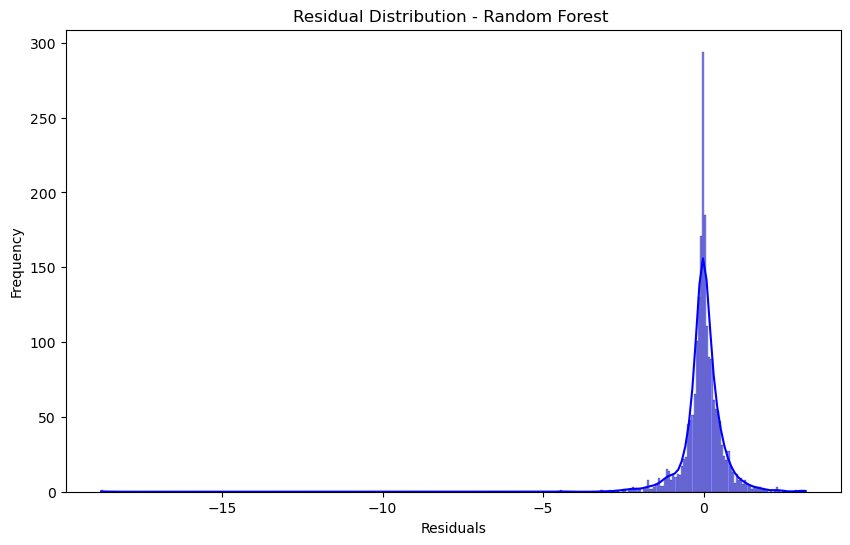

Random Forest - K-Fold RMSE: 2.566109305274703


<Figure size 1000x600 with 0 Axes>

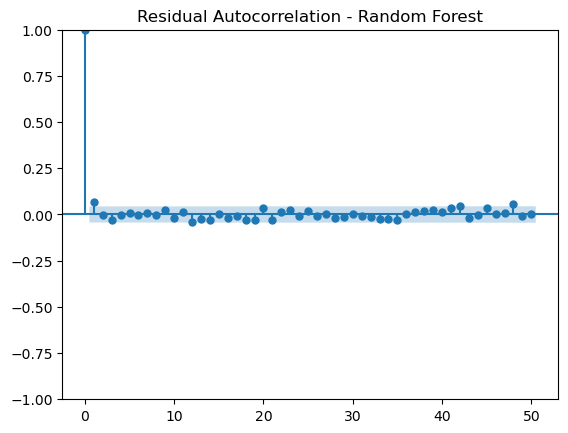

Kolmogorov-Smirnov Test for Random Forest: KS Statistic = 0.20213149129698413, p-value = 2.2973226632665873e-73


In [32]:
# Initialize the model (already trained)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Metrics
rmse_rf = calculate_rmse(y_test, y_pred_rf)
explained_variance_rf = calculate_explained_variance(y_test, y_pred_rf)
r2_rf = calculate_r2(y_test, y_pred_rf)
mse_rf = calculate_mse(y_test, y_pred_rf)
mae_rf = calculate_mae(y_test, y_pred_rf)
mape_rf = calculate_mape(y_test, y_pred_rf)
adjusted_r2_rf = calculate_adjusted_r2(r2_rf, len(y_test), X_test.shape[1])

# Print results
print(f"Random Forest - RMSE: {rmse_rf}")
print(f"Random Forest - Explained Variance: {explained_variance_rf}")
print(f"Random Forest - R²: {r2_rf}")
print(f"Random Forest - MSE: {mse_rf}")
print(f"Random Forest - MAE: {mae_rf}")
print(f"Random Forest - MAPE: {mape_rf}")
print(f"Random Forest - Adjusted R²: {adjusted_r2_rf}")

# Plot Residual Distribution
plot_residual_distribution(y_test, y_pred_rf, 'Random Forest ')

# K-Fold Cross-Validation
cv_rf = calculate_kfold_cv(rf_model, X, y)
print(f"Random Forest - K-Fold RMSE: {cv_rf}")

# Residual Autocorrelation
plot_residual_autocorrelation(y_test, y_pred_rf, 'Random Forest')

# Kolmogorov-Smirnov Test
calculate_ks_test(y_test, y_pred_rf, 'Random Forest')

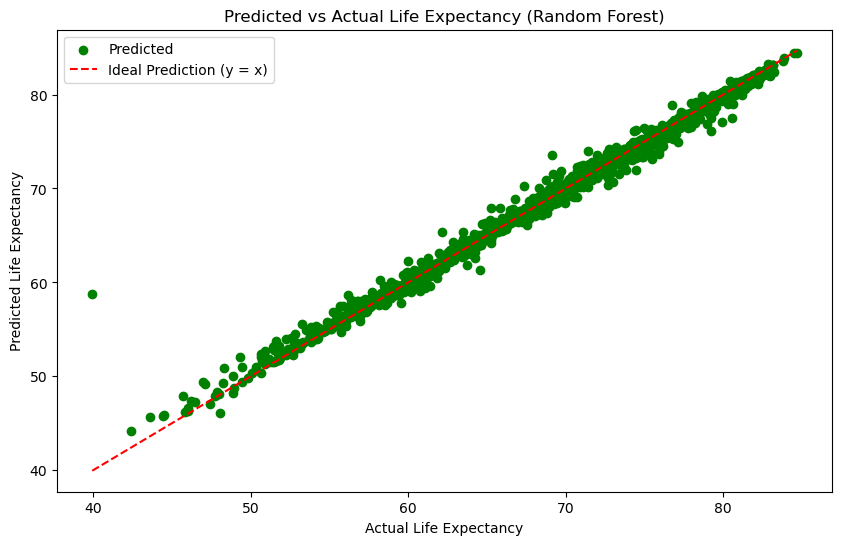

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='green', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Prediction (y = x)")
plt.title('Predicted vs Actual Life Expectancy (Random Forest)')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.legend()
plt.show()

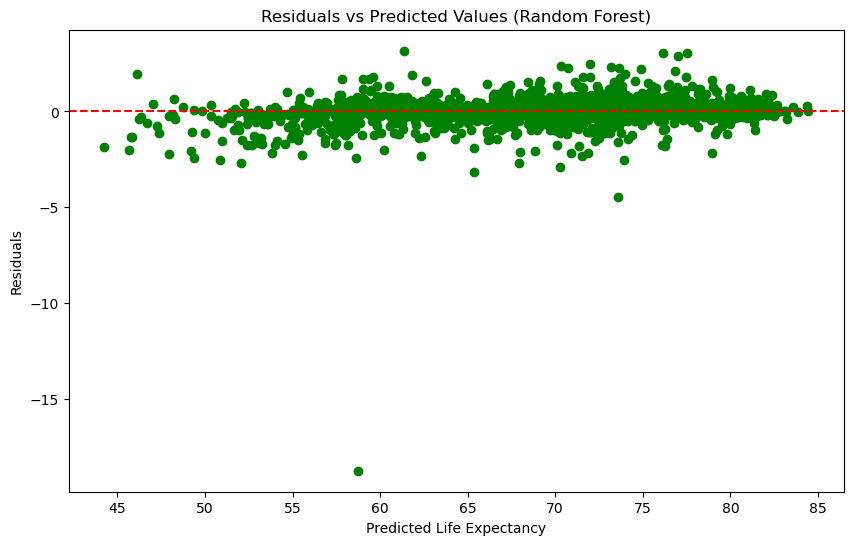

In [34]:
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals_rf, color='green')
plt.axhline(0, color='red', linestyle='--')  # Ideal line where residuals = 0
plt.title('Residuals vs Predicted Values (Random Forest)')
plt.xlabel('Predicted Life Expectancy')
plt.ylabel('Residuals')
plt.show()


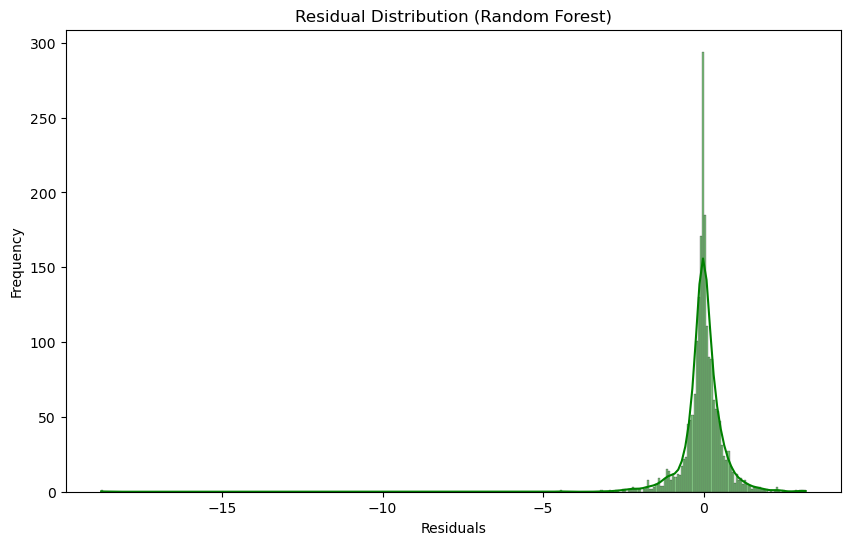

In [35]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(residuals_rf, kde=True, color='green')
plt.title('Residual Distribution (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [42]:
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [44]:
import joblib

# 1) Load your existing model
rf = joblib.load("random_forest_model.pkl")

# 2) Dump it back out with gzip compression
joblib.dump(
    rf,
    "random_forest_model_compressed.pkl",
    compress=("gzip", 3)   # change 3→9 for higher compression at the cost of time
)


['random_forest_model_compressed.pkl']